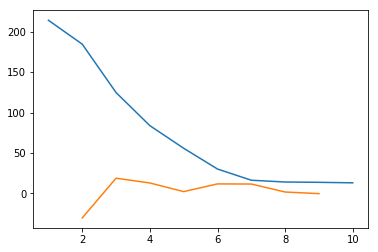

clusters: 3


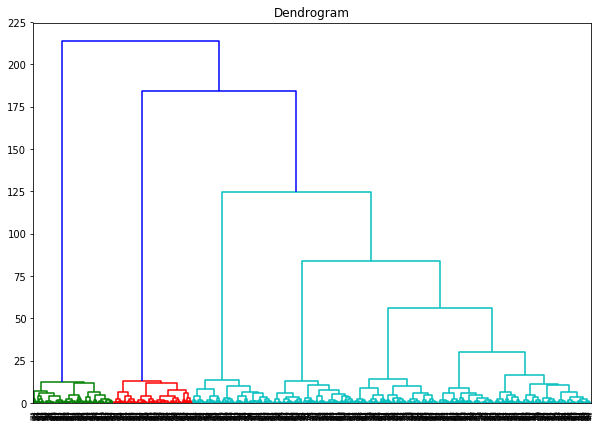

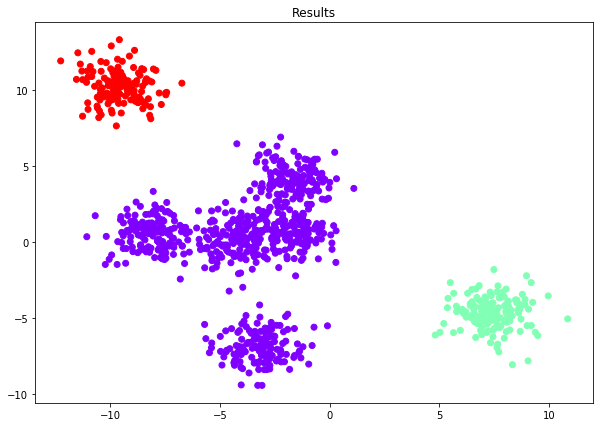

In [47]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

coords_raw = pd.read_csv("C:\\Users\Bence\Desktop\probafeladat\data.csv").iloc[::].values
#print(coords_raw[:10])
num_of_coords = len(coords_raw)
coords_data = np.zeros((num_of_coords,2))

for i in range(num_of_coords):
    coord_pair = coords_raw[i][0].split(";")
    coords_data[i][0] = coord_pair[0]
    coords_data[i][1] = coord_pair[1]
    
Z = shc.linkage(coords_data,"ward")
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)




plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(coords_data, method='ward'))
plt.show()


cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(coords_data)

plt.figure(figsize=(10, 7))
plt.title("Results")
plt.scatter(coords_data[:,0], coords_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
